In [1]:
!wget ivc0023.ivitco.com/pgmuestra.zip
!wget ivc0023.ivitco.com/pg92.zip

--2021-09-21 02:44:39--  http://ivc0023.ivitco.com/pgmuestra.zip
Resolving ivc0023.ivitco.com (ivc0023.ivitco.com)... 192.99.8.125
Connecting to ivc0023.ivitco.com (ivc0023.ivitco.com)|192.99.8.125|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ivc0023.ivitco.com/pgmuestra.zip [following]
--2021-09-21 02:44:39--  https://ivc0023.ivitco.com/pgmuestra.zip
Connecting to ivc0023.ivitco.com (ivc0023.ivitco.com)|192.99.8.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1770957 (1.7M) [application/zip]
Saving to: ‘pgmuestra.zip’

pgmuestra.zip       100%[===================>]   1.69M  9.24MB/s    in 0.2s    

2021-09-21 02:44:40 (9.24 MB/s) - ‘pgmuestra.zip’ saved [1770957/1770957]

--2021-09-21 02:44:40--  http://ivc0023.ivitco.com/pg92.zip
Resolving ivc0023.ivitco.com (ivc0023.ivitco.com)... 192.99.8.125
Connecting to ivc0023.ivitco.com (ivc0023.ivitco.com)|192.99.8.125|:80... connected.
HTTP request sent, await

In [2]:
!unzip pgmuestra.zip
!unzip pg92.zip

Archive:  pgmuestra.zip
   creating: pgmuestra/
   creating: pgmuestra/gato/
  inflating: pgmuestra/gato/01.jpg   
  inflating: pgmuestra/gato/02.jpg   
  inflating: pgmuestra/gato/03.jpg   
  inflating: pgmuestra/gato/04.jpg   
  inflating: pgmuestra/gato/05.jpg   
  inflating: pgmuestra/gato/06.jpg   
  inflating: pgmuestra/gato/07.jpg   
  inflating: pgmuestra/gato/08.jpg   
  inflating: pgmuestra/gato/09.jpg   
  inflating: pgmuestra/gato/10.jpg   
  inflating: pgmuestra/gato/11.jpg   
  inflating: pgmuestra/gato/12.jpg   
  inflating: pgmuestra/gato/13.jpg   
  inflating: pgmuestra/gato/14.jpg   
  inflating: pgmuestra/gato/15.jpg   
  inflating: pgmuestra/gato/16.jpg   
  inflating: pgmuestra/gato/17.jpg   
  inflating: pgmuestra/gato/18.jpg   
  inflating: pgmuestra/gato/19.jpg   
  inflating: pgmuestra/gato/20.jpg   
  inflating: pgmuestra/gato/21.jpg   
  inflating: pgmuestra/gato/22.jpg   
  inflating: pgmuestra/gato/23.jpg   
  inflating: pgmuestra/gato/24.jpg   
  inflating

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
import tensorflow.keras as ke

In [4]:
modelo = ke.models.load_model("pg92.h5")

In [5]:
modelo.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 150, 150, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 75, 75, 32)   896         rescaling[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 75, 75, 32)   128         conv2d[0][0]                     
_______________________________________________________________________________________

probabilidad de que sea un perro:  0.9999995


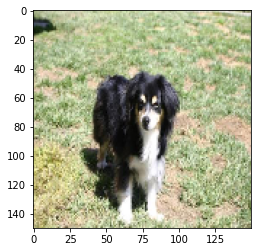

In [6]:
ruta = "pgmuestra/perro/01.jpg"
img = ke.preprocessing.image.load_img(ruta,target_size=(150,150))
imga = ke.preprocessing.image.img_to_array(img)
y = modelo.predict(imga[None,...])
plt.imshow(img)
prob=y[0][0]
print("probabilidad de que sea un perro: ",prob)

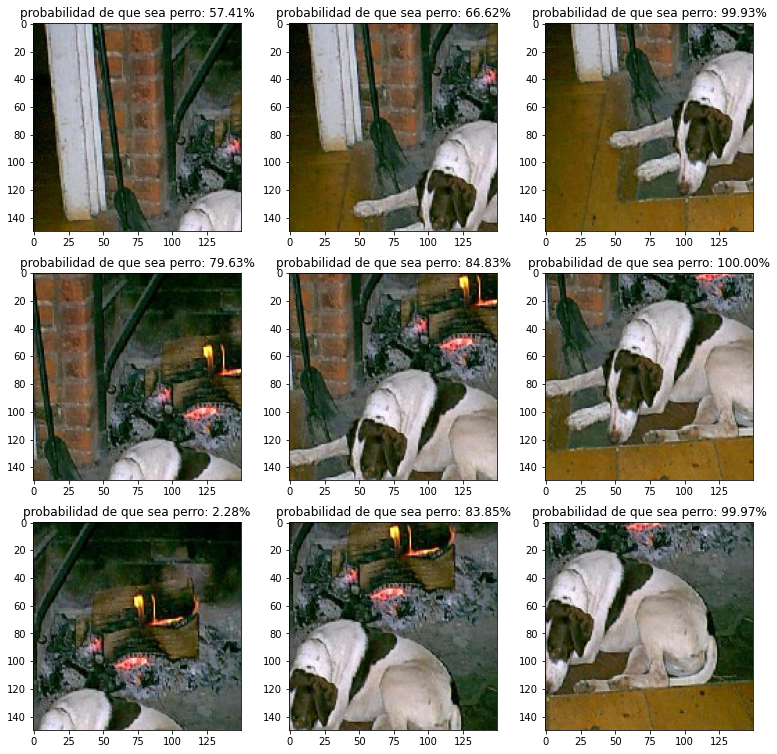

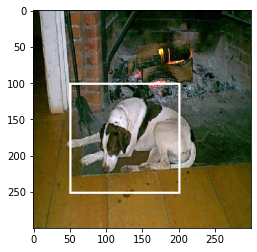

In [7]:
ruta = "pgmuestra/perro/03.jpg"
img = ke.preprocessing.image.load_img(ruta, target_size=(300,300))
imga = ke.preprocessing.image.img_to_array(img)
delta=50

plt.figure(figsize=(13,13))
max_prob = 0
max_xy = (0,0)
id=0

#ventana de deteccion es de 150x150
yi=0
for c in range(3):
  xi = 0
  for f in range(3):
    r = imga[xi:xi+150, yi:yi+150,:]
    ypred = modelo.predict(r[None,...])
    prob = ypred[0][0]

    if  prob>max_prob:
      max_prob = prob
      max_xy = (xi,yi)

    id = id+1

    plt.subplot(3,3,id)
    plt.imshow(r.astype(np.uint8))
    plt.title("probabilidad de que sea perro: {:.2%}".format(prob))

    xi = xi+delta
  yi = yi+delta
plt.show()

imga[ max_xy[0]:max_xy[0]+3, max_xy[1]:max_xy[1]+150, : ] = 255
imga[ max_xy[0]+150:max_xy[0]+150+3, max_xy[1]:max_xy[1]+150, : ] = 255
imga[ max_xy[0]:max_xy[0]+150+3, max_xy[1]:max_xy[1]+3, : ] = 255
imga[ max_xy[0]:max_xy[0]+150+3, max_xy[1]+150:max_xy[1]+3+150, : ] = 255
plt.imshow(imga.astype(np.uint8))

In [8]:
import cv2

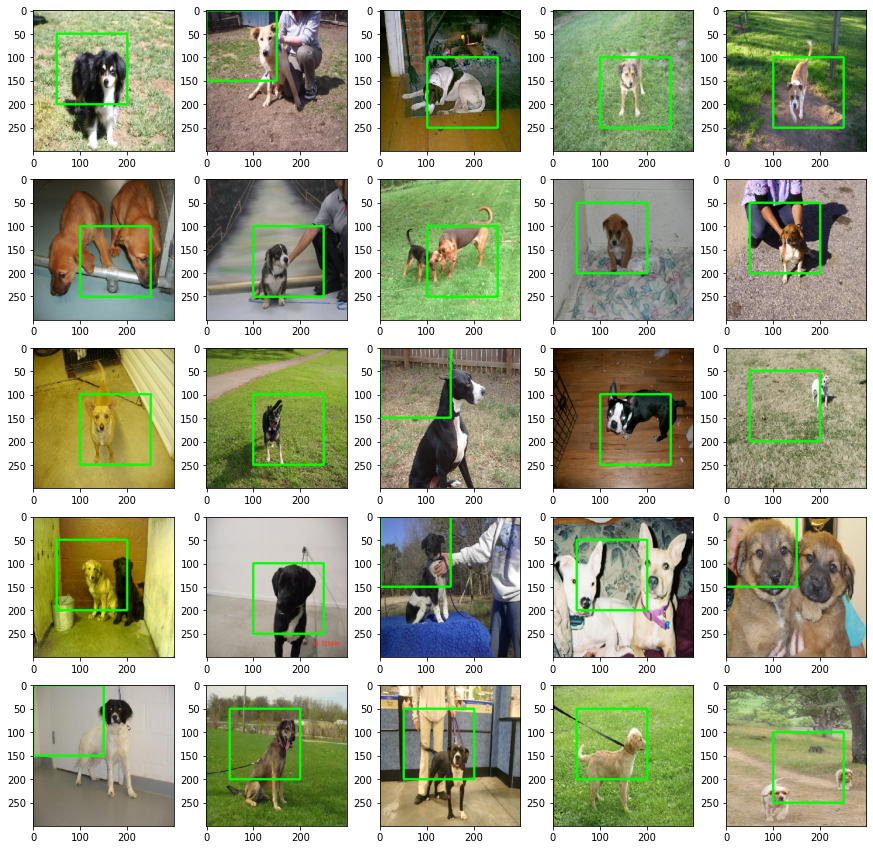

In [9]:
plt.figure(figsize=(15,15))
id=0
for i in range(25):
  s = "pgmuestra/perro/{:02d}.jpg".format(i+1)
  img = ke.preprocessing.image.load_img(s,target_size=(300,300))
  imga = ke.preprocessing.image.img_to_array(img)
  delta= 50
  max_prob =0
  max_xy = (0,0)
  

  yi =0
  for c in range(3):
    xi = 0
    for f in range(3):
      r = imga[xi:xi+150, yi:yi+150,:]
      ypred = modelo.predict(r[None,...])
      prob = ypred[0][0]

      if  prob>max_prob:
        max_prob = prob
        max_xy = (xi,yi)

      xi = xi+delta
    yi = yi+delta

  xi = int(max_xy[0])
  yi = int(max_xy[0])
  xf = int(xi+150)
  yf = int(yi+150)

  #img = imga[xi:xf, yi:yf, :]
  img = cv2.rectangle(imga,(xi,yi), (xf,yf), (0,255,0), 3)
  id = id+1
  plt.subplot(5,5,id)
  plt.imshow(img.astype(np.uint8))

In [10]:
!wget ivc0023.ivitco.com/caltech.zip
!wget ivc0023.ivitco.com/caltech_recuadros.csv

--2021-09-21 02:45:56--  http://ivc0023.ivitco.com/caltech.zip
Resolving ivc0023.ivitco.com (ivc0023.ivitco.com)... 192.99.8.125
Connecting to ivc0023.ivitco.com (ivc0023.ivitco.com)|192.99.8.125|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ivc0023.ivitco.com/caltech.zip [following]
--2021-09-21 02:45:56--  https://ivc0023.ivitco.com/caltech.zip
Connecting to ivc0023.ivitco.com (ivc0023.ivitco.com)|192.99.8.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3808782 (3.6M) [application/zip]
Saving to: ‘caltech.zip’

caltech.zip         100%[===================>]   3.63M  8.12MB/s    in 0.4s    

2021-09-21 02:45:56 (8.12 MB/s) - ‘caltech.zip’ saved [3808782/3808782]

--2021-09-21 02:45:57--  http://ivc0023.ivitco.com/caltech_recuadros.csv
Resolving ivc0023.ivitco.com (ivc0023.ivitco.com)... 192.99.8.125
Connecting to ivc0023.ivitco.com (ivc0023.ivitco.com)|192.99.8.125|:80... connected.
HTTP request sent, aw

In [11]:
!unzip caltech.zip

Archive:  caltech.zip
   creating: CALTECH/
   creating: CALTECH/CALTECH_Annotations/
   creating: CALTECH/CALTECH_Annotations/butterfly/
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0001.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0003.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0004.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0005.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0006.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0007.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0008.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0009.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0010.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0011.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0012.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotati

In [12]:
import pandas as pd
recuadros = pd.read_csv("caltech_recuadros.csv")

In [13]:
recuadros.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,butterfly/image_0001.jpg,300,198,butterfly,11,3,284,188
1,butterfly/image_0003.jpg,300,192,butterfly,4,39,272,192
2,butterfly/image_0004.jpg,300,271,butterfly,10,9,289,264
3,butterfly/image_0005.jpg,300,278,butterfly,45,55,299,204
4,butterfly/image_0006.jpg,300,271,butterfly,50,20,299,265


In [14]:
data = ke.preprocessing.image_dataset_from_directory("CALTECH/CALTECH_Dataset",
                                                     batch_size=218, shuffle=False)

Found 218 files belonging to 3 classes.


In [15]:
dl = list (data.as_numpy_iterator())

In [16]:
x = dl[0][0]
y = dl[0][1]

In [17]:
xt = x/255.0
yclase = ke.utils.to_categorical(y)

In [18]:
xi = recuadros["xmin"]/recuadros["width"]
xf = recuadros["xmax"]/recuadros["width"]
yi = recuadros["ymin"]/recuadros["height"]
yf = recuadros["ymax"]/recuadros["height"]

In [19]:
yrecuadro = np.stack([xi,yi,xf,yf]).transpose()

In [20]:
yrecuadro.shape

(218, 4)

In [21]:
data.class_names

['butterfly', 'cougar_face', 'elephant']

In [22]:
plt.figure(figsize=(20,20))
for i in range(218):
  plt.subplot(14,16,i+1)
  plt.axis("off")
  plt.imshow(x[i].astype(np.uint8))
  plt.title(data.class_names[y[i]])

Output hidden; open in https://colab.research.google.com to view.

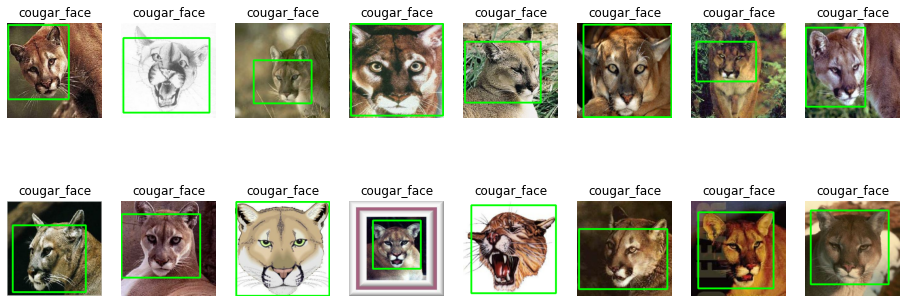

In [23]:
plt.figure(figsize=(16,6))
id=0
for i in range(96,96+16):
  id+=1
  plt.subplot(2,8,id)
  plt.axis("off")
  xi = int (yrecuadro[i][0]*256)
  yi = int (yrecuadro[i][1]*256)
  xf = int (yrecuadro[i][2]*256)
  yf = int (yrecuadro[i][3]*256)

  img = cv2.rectangle( x[i].copy(), (xi,yi),(xf,yf), (0,255,0), 3 )
  plt.imshow(img.astype(np.uint8))
  plt.title(data.class_names[y[i]])

In [44]:
capa_entrada = ke.layers.Input(shape=(256,256,3))
capa_oculta = ke.layers.Conv2D(64, 3, padding="same", activation="relu")(capa_entrada)
capa_oculta = ke.layers.Conv2D(64, 3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPool2D()(capa_oculta)

capa_oculta = ke.layers.Conv2D(128, 3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(128, 3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPool2D()(capa_oculta)

capa_oculta = ke.layers.Conv2D(256, 3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(256, 3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPool2D()(capa_oculta)

fin_capas_cv = ke.layers.Flatten()(capa_oculta)
#salida para la clase
capa_oculta = ke.layers.Dense(128, activation="relu")(fin_capas_cv)
capa_oculta = ke.layers.Dropout(0.5)(capa_oculta)
capa_oculta = ke.layers.Dense(32, activation="relu")(capa_oculta)
capa_oculta = ke.layers.Dropout(0.1)(capa_oculta)
capa_salida_clase = ke.layers.Dense(3, activation="softmax", name="salida_clase")(capa_oculta)

#salida para el cuadro

capa_oculta = ke.layers.Dense(128)(fin_capas_cv)
capa_oculta = ke.layers.Dropout(0.1)(capa_oculta)
capa_oculta = ke.layers.Dense(32)(capa_oculta)
capa_salida_recuadro = ke.layers.Dense(4, activation="sigmoid", name = "salida_recuadro")(capa_oculta)


modelo = ke.models.Model(inputs=capa_entrada, outputs=[capa_salida_clase, capa_salida_recuadro])
modelo.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 256, 256, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_12[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_13[0][0]                  
____________________________________________________________________________________________

In [45]:
errores = {"salida_clase":"categorical_crossentropy",
           "salida_recuadro":"mean_squared_error"}

metricas = {"salida_clase":"accuracy", "salida_recuadro":"mse"}
modelo.compile(loss=errores, metrics=metricas, optimizer="sgd")

In [46]:
modelo.fit(xt,{"salida_clase":yclase,"salida_recuadro":yrecuadro},epochs=50,batch_size=32)

Epoch 1/50
7/7 [==============================] - 6s 657ms/step - loss: 1.2361 - salida_clase_loss: 1.0922 - salida_recuadro_loss: 0.1439 - salida_clase_accuracy: 0.4771 - salida_recuadro_mse: 0.1439
Epoch 2/50
7/7 [==============================] - 5s 649ms/step - loss: 1.1504 - salida_clase_loss: 1.0946 - salida_recuadro_loss: 0.0558 - salida_clase_accuracy: 0.3945 - salida_recuadro_mse: 0.0558
Epoch 3/50
7/7 [==============================] - 5s 651ms/step - loss: 1.1112 - salida_clase_loss: 1.0944 - salida_recuadro_loss: 0.0168 - salida_clase_accuracy: 0.3670 - salida_recuadro_mse: 0.0168
Epoch 4/50
7/7 [==============================] - 5s 651ms/step - loss: 1.0997 - salida_clase_loss: 1.0894 - salida_recuadro_loss: 0.0102 - salida_clase_accuracy: 0.3899 - salida_recuadro_mse: 0.0102
Epoch 5/50
7/7 [==============================] - 5s 653ms/step - loss: 1.0838 - salida_clase_loss: 1.0745 - salida_recuadro_loss: 0.0093 - salida_clase_accuracy: 0.4083 - salida_recuadro_mse: 0.0093


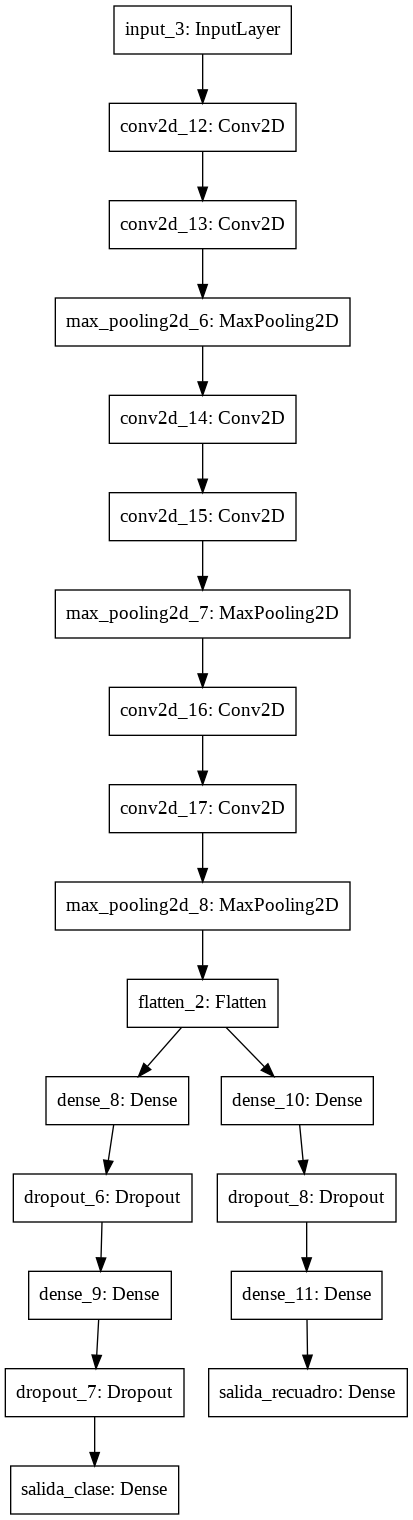

In [47]:
ke.utils.plot_model(modelo,to_file="modelo.png")

In [65]:
idx=120
ret = modelo.predict(xt[idx:idx+1])
clase = ret[0][0].argmax()
recuadro = ret[1][0]

clase: cougar_face


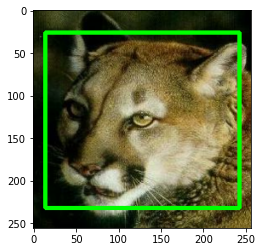

In [66]:
xi = int (recuadro[0]*256)
yi = int (recuadro[1]*256)
xf = int (recuadro[2]*256)
yf = int (recuadro[3]*256)

img = cv2.rectangle( x[idx].copy(), (xi,yi),(xf,yf), (0,255,0), 3 )
plt.imshow(img.astype(np.uint8))
print("clase:",data.class_names[clase])